In [13]:
!pip install tensorflow_addons
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

dfTest = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv")
dfTrain = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv")

#print(dfTrain)

<h1>Introduction</h1>
In this case we look into if one can make neuralnetwork to tell if review was positive, negative or neutral from text only. We are using drugs.com reviews as data.<br>
Which data we got from kaggles Jessica Li who used this data to their hackathon exercize.<br>
The data had id, drug name, condition (for what the drug is for), review, rating, date and useful count columns. The review is text which the user has written. Rating has scores 1-10 where we decided that 7-10 is positive review, 5-6 is neutral review and 0-4 is a negative one. Date column tells when the review has been added in the website and useful count tells how many people find that review as usefull.

In [14]:
dfTest = dfTest.drop(columns="uniqueID")
dfTrain = dfTrain.drop(columns="uniqueID")
dfTest.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [15]:


dict = {0 : 'negative', 1 : 'negative', 2: 'negative', 3 : 'negative', 4 : 'negative', 5 : 'neutral',
       6 : 'neutral', 7 : 'positive', 8 : 'positive', 9 : 'positive', 10: 'positive'}

dfTrain['rating'] = dfTrain['rating'].map(dict)

dfTrain['rating'] = dfTrain['rating'].astype(pd.api.types.CategoricalDtype(ordered = True))


dfTrain['rating_encoded'] = dfTrain['rating'].cat.codes

dfTrain['rating_encoded'] = dfTrain['rating_encoded'].replace(0, 3)

#print(enc_df)



print(dfTrain.tail())

                  drugName              condition  \
161292             Campral     Alcohol Dependence   
161293      Metoclopramide        Nausea/Vomiting   
161294             Orencia   Rheumatoid Arthritis   
161295  Thyroid desiccated    Underactive Thyroid   
161296        Lubiprostone  Constipation, Chronic   

                                                   review    rating  \
161292  "I wrote my first report in Mid-October of 201...  positive   
161293  "I was given this in IV before surgey. I immed...  negative   
161294  "Limited improvement after 4 months, developed...  negative   
161295  "I&#039;ve been on thyroid medication 49 years...  positive   
161296  "I&#039;ve had chronic constipation all my adu...  positive   

             date  usefulCount  rating_encoded  
161292  31-May-15          125               2  
161293   1-Nov-11           34               3  
161294  15-Mar-14           35               3  
161295  19-Sep-15           79               2  
161296  1

In [16]:


dict = {0 : 'negative', 1 : 'negative', 2: 'negative', 3 : 'negative', 4 : 'negative', 5 : 'neutral',
       6 : 'neutral', 7 : 'positive', 8 : 'positive', 9 : 'positive', 10: 'positive'}

dfTest['rating'] = dfTest['rating'].map(dict)

dfTest['rating'] = dfTest['rating'].astype(pd.api.types.CategoricalDtype(ordered = True))

dfTest['rating_encoded'] = dfTest['rating'].cat.codes

dfTest['rating_encoded'] = dfTest['rating_encoded'].replace(0, 3)

print(dfTest.head())
print(dfTest.dtypes)

          drugName                     condition  \
0      Mirtazapine                    Depression   
1       Mesalamine  Crohn's Disease, Maintenance   
2          Bactrim       Urinary Tract Infection   
3         Contrave                   Weight Loss   
4  Cyclafem 1 / 35                 Birth Control   

                                              review    rating       date  \
0  "I&#039;ve tried a few antidepressants over th...  positive  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...  positive  17-May-09   
2                      "Quick reduction of symptoms"  positive  29-Sep-17   
3  "Contrave combines drugs that were used for al...  positive   5-Mar-17   
4  "I have been on this birth control for one cyc...  positive  22-Oct-15   

   usefulCount  rating_encoded  
0           22               2  
1           17               2  
2            3               2  
3           35               2  
4            4               2  
drugName            object

In [17]:


train_samples = dfTrain['review'].values.tolist()
train_labels = dfTrain['rating_encoded'].values
test_samples = dfTest['review'].values.tolist()
test_labels = dfTest['rating_encoded'].values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels = train_labels[:,1:]
test_labels = test_labels[:,1:]

print(train_labels.shape, test_labels.shape)

print(train_labels)

(161297, 3) (53766, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In here we use tokenizer to make 5000 most common words to numbers 1 to 5000 where word 1 is most common in texts.

In [18]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_samples)
train_sequences = tokenizer.texts_to_sequences(train_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)
print(train_sequences[0])
print(test_sequences[0])

[5, 38, 28, 35, 197, 1, 45, 5, 15, 848, 12, 2922, 99, 150, 2, 3806, 1551]
[1, 8, 39, 134, 7, 126, 1031, 104, 3, 41, 1643, 2506, 2058, 16, 727, 12, 378, 191, 21, 6, 143, 398, 166, 98, 6, 78, 710, 2, 337, 17, 2068, 2417, 2, 14, 111, 38, 637, 6, 92, 1737, 1, 11, 18, 28, 35, 43, 611, 3, 212, 1311, 82, 193, 1, 8, 39, 315, 192, 1490, 12, 82, 1, 96, 11, 761, 465, 16, 2417, 38, 637, 17]


Here we made so that all the reviews have same lenght of 100 words. If review has fewer than 100 words this adds 0s before in the array. If the review has more than 100 words then pad_sequences will cut the words to 100 lenght so that the first words are taken first in review.

In [19]:
max_len = 100
train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen = max_len)
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen = max_len)
print(train_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    5
   38   28   35  197    1   45    5   15  848   12 2922   99  150    2
 3806 1551]


As our model we made it have 3 layers where first layer is embedding layer and second is SimpleRNN layer. As final layer we used a dense layer and it's activation function we used a softmax. Because it is great to use in multiclass problem like one we have.

In [20]:
model = Sequential()
model.add(Embedding(5000, 16))
model.add(SimpleRNN(16))
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 80,579
Trainable params: 80,579
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [tfa.metrics.CohenKappa(num_classes = 3), 'acc'])

history = model.fit(train_sequences, train_labels,verbose=0, epochs = 10,  validation_split = 0.2)

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
kappa = history.history['cohen_kappa']
val_kappa = history.history['val_cohen_kappa']

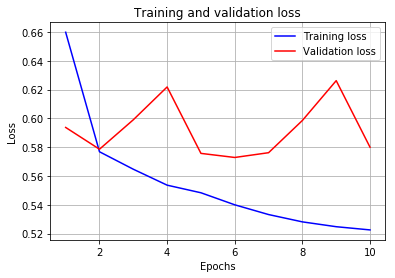

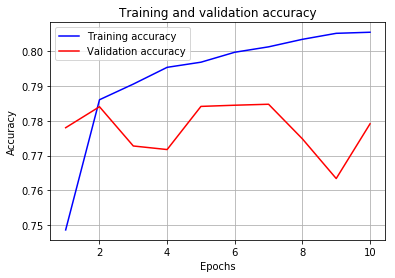

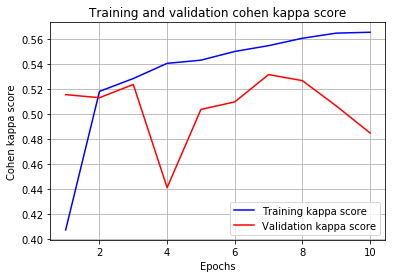

In [23]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, acc, 'b-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, kappa, 'b-', label = 'Training kappa score')
plt.plot(epochs, val_kappa, 'r-', label = 'Validation kappa score')
plt.xlabel('Epochs')
plt.ylabel('Cohen kappa score')
plt.title('Training and validation cohen kappa score')
plt.grid()
plt.legend()
plt.show()

In the first diagram we find that validation score in the training data was at best a 0.525 while validation was 0.575. Second diagram shows accuracy as being in training 0.8 while validation was at best 0.785. And at last we have cohen kappa score which got with training data a 0.55 and with validation data at best 0.53 in 7th epoch. <br><br>
This tells us that we can somewhat predict what scores the user gives based on what they say in the reviews. But accuracy was at best only 0.8 which means that it's somewhat accurate. But it will need better training to be more accurate. And Cohen's kappa score was about 0.53 which means it's rather fair score.

In [24]:
def predict(sample):
    prediction = model.predict_classes(sample)
    if prediction[0] == 1:
        return 'neutral'
    elif prediction[0] == 2:
        return 'positive'
    else:
        return 'negative'
        
print(predict(test_sequences[16000]))

neutral
